<a href="https://colab.research.google.com/github/arka57/CNN/blob/main/CNN2_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [2]:
#downloading the data
train=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader=torch.utils.data.DataLoader(train,batch_size=4,shuffle=True)

In [5]:
dataiter=iter(trainloader)#for iterating trainloader. Here dataiter will have 1 batch of data of 4 images

In [6]:
images,labels=dataiter.next()

In [7]:
print(images.shape) #4-batch size, 3X32X32 dimensions for a RGB image
print(images[0].shape)#shape of 1st image in batch size of 4
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
1


In [8]:
from torch.nn.modules.pooling import AvgPool2d
#Defining the LeNet Model

class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn=nn.Sequential(
            nn.Conv2d(3,6,(5,5)),          #(3,32,32)--->(6,28,28)
            nn.Tanh(),
            nn.AvgPool2d((2,2),stride=2),  #(6,28,28)--->(6,14,14)
            nn.Conv2d(6,16,(5,5)),         #(6,14,14)--->(16,10,10)
            nn.Tanh(),
            nn.AvgPool2d((2,2),stride=2)   #(16,10,10)--->(16,5,5) 
        )

        self.fc_model=nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )

    def forward(self,x):
        #print(x.shape)
        x=self.cnn(x)
        #print(x.shape)#Convolution part done (16,5,5)
        x=x.view(x.size(0),-1)#converting to fully connected layer(16,5,5)-->16X5X5=400.First index remains same.it is for batch. All remaining done in one single dimension i.e 400 rows
        #print(x.shape)
        x=self.fc_model(x)
        #print(x.shape)
        return x

        

In [10]:
net=LeNet()#instantiating the network
output=net(images)#passing 1 batch of 4 images to the network

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [11]:
# 4 rows with each row having 10 columns (10 possible outcomes and their probabilities).Softmax not needed here as whoever has max value out of 10 will be the predicted class.
#But in BackProp we need Softmax and that is implemented in CrossEntropy Function

print(output)

tensor([[-0.0352,  0.0224,  0.0713,  0.0528,  0.0208,  0.0177,  0.1228,  0.1002,
         -0.1284, -0.0607],
        [-0.0353,  0.0087,  0.0620,  0.0491,  0.0210,  0.0171,  0.1231,  0.0972,
         -0.1323, -0.0881],
        [-0.0588,  0.0200,  0.0660,  0.0476, -0.0049,  0.0162,  0.1577,  0.0803,
         -0.1578, -0.0348],
        [-0.0260,  0.0194,  0.0656,  0.0558,  0.0112,  0.0328,  0.1292,  0.0830,
         -0.1369, -0.0634]], grad_fn=<AddmmBackward0>)


In [15]:
print(output.shape)

torch.Size([4, 10])


In [14]:
torch.max(output,1)#return max values of each row and also the index of the max value

torch.return_types.max(
values=tensor([0.1228, 0.1231, 0.1577, 0.1292], grad_fn=<MaxBackward0>),
indices=tensor([6, 6, 6, 6]))

In [18]:
max_values,pred_class=torch.max(output,1)
print(max_values)
print(pred_class)

tensor([0.1228, 0.1231, 0.1577, 0.1292], grad_fn=<MaxBackward0>)
tensor([6, 6, 6, 6])


In [20]:
max_values,_=torch.max(output,1)
print(max_values)

tensor([0.1228, 0.1231, 0.1577, 0.1292], grad_fn=<MaxBackward0>)


In [21]:
_,pred_class=torch.max(output,1)
print(pred_class)

tensor([6, 6, 6, 6])


Now applying the LeNet model on the entire dataset and training it

In [4]:
#Downoading dataset and creating the dataloaders
train=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(train,batch_size=128,shuffle=True)
test=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(test,batch_size=128,shuffle=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [40]:
#Evaluation function to determine accuracy
def evaluate(dataloader):
    total=0
    correct=0
    for i in dataloader:
        images,labels=i
        outputs=net(images)
        _,pred=torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()#adding in correct only those whose pred and labels are same
    return (correct/total)*100    

In [39]:
net=LeNet()#instantiating model

In [41]:
#initialsing optimiser Adam
import torch.optim as optim
opt=optim.Adam(net.parameters())
loss_fn=nn.CrossEntropyLoss()

In [ ]:
#Learning Algorithm

Epochs 0/16, Train Accuracy=38,Test Accuracy=37
Epochs 1/16, Train Accuracy=44,Test Accuracy=43
Epochs 2/16, Train Accuracy=47,Test Accuracy=45
Epochs 3/16, Train Accuracy=50,Test Accuracy=48
Epochs 4/16, Train Accuracy=53,Test Accuracy=50
Epochs 5/16, Train Accuracy=55,Test Accuracy=51
Epochs 6/16, Train Accuracy=56,Test Accuracy=52
Epochs 7/16, Train Accuracy=57,Test Accuracy=53
Epochs 8/16, Train Accuracy=59,Test Accuracy=54
Epochs 9/16, Train Accuracy=59,Test Accuracy=53
Epochs 10/16, Train Accuracy=61,Test Accuracy=54
Epochs 11/16, Train Accuracy=62,Test Accuracy=54
Epochs 12/16, Train Accuracy=62,Test Accuracy=54
Epochs 13/16, Train Accuracy=63,Test Accuracy=55
Epochs 14/16, Train Accuracy=64,Test Accuracy=55
Epochs 15/16, Train Accuracy=66,Test Accuracy=55


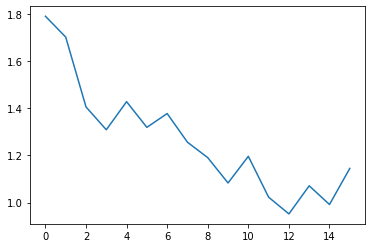

In [42]:
loss_epoch=[]
epochs=16

for i in range(epochs):

    for _,data in enumerate(trainloader,0):
        
        inputs,labels=data
        output=net(inputs)
        loss=loss_fn(output,labels)

        loss.backward()

        opt.step()

        opt.zero_grad()
    loss_epoch.append(loss.item())
    print('Epochs %d/%d, Train Accuracy=%d,Test Accuracy=%d'%(i,epochs,evaluate(trainloader),evaluate(testloader)))       
plt.plot(loss_epoch)
plt.show()    

In [ ]:
#observation: There is significant overfitting happening. Can be reduced using regularization
#Loss going down over epochs

In [ ]:
#Same LeNet model now in GPU

In [43]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [5]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [6]:
def evaluate(dataloader):
    total=0
    correct=0
    for i in dataloader:
        images,labels=i
        images,labels = images.to(device), labels.to(device)
        outputs=net(images)
        _,pred=torch.max(outputs,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()#adding in correct only those whose pred and labels are same
    return (correct/total)*100  

In [11]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epochs 0/16, Train Accuracy=38,Test Accuracy=38
Epochs 1/16, Train Accuracy=42,Test Accuracy=42
Epochs 2/16, Train Accuracy=47,Test Accuracy=46
Epochs 3/16, Train Accuracy=50,Test Accuracy=49
Epochs 4/16, Train Accuracy=52,Test Accuracy=50
Epochs 5/16, Train Accuracy=54,Test Accuracy=52
Epochs 6/16, Train Accuracy=56,Test Accuracy=53
Epochs 7/16, Train Accuracy=57,Test Accuracy=52
Epochs 8/16, Train Accuracy=59,Test Accuracy=54
Epochs 9/16, Train Accuracy=59,Test Accuracy=54
Epochs 10/16, Train Accuracy=61,Test Accuracy=55
Epochs 11/16, Train Accuracy=61,Test Accuracy=54
Epochs 12/16, Train Accuracy=62,Test Accuracy=54
Epochs 13/16, Train Accuracy=63,Test Accuracy=55
Epochs 14/16, Train Accuracy=63,Test Accuracy=55
Epochs 15/16, Train Accuracy=64,Test Accuracy=56


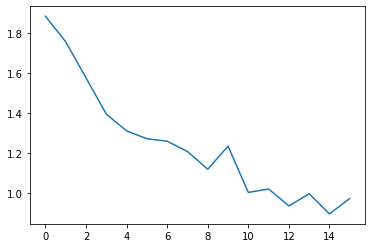

In [13]:
loss_epoch=[]
epochs=16

for i in range(epochs):

    for _,data in enumerate(trainloader,0):
        
        inputs,labels=data
        inputs,labels = inputs.to(device), labels.to(device)
        output=net(inputs)
        loss=loss_fn(output,labels)

        loss.backward()

        opt.step()

        opt.zero_grad()
    loss_epoch.append(loss.item())
    print('Epochs %d/%d, Train Accuracy=%d,Test Accuracy=%d'%(i,epochs,evaluate(trainloader),evaluate(testloader)))       
plt.plot(loss_epoch)
plt.show()    